In [ ]:
# gdalwarp -te -70.1 0 -70.0 1.0 Hansen_GFC-2016-v1.4_lossyear_10N_080W.tif output.tif

In [2]:
from osgeo import gdal

dataset = gdal.Open("output.tif", gdal.GA_ReadOnly)
#for x in range(1, dataset.RasterCount + 1):
#    band = dataset.GetRasterBand(x)
#    array = band.ReadAsArray()

In [4]:
array = dataset.ReadAsArray()

In [5]:
array.shape

(4000, 400)

In [6]:
#plt.imshow(array, cmap='gist_earth')
#plt.show()

In [7]:
#array = array[:1000, :1000]

In [8]:
#array

In [9]:
#r, c = np.nonzero(array)

In [10]:
#plt.scatter(r, c, c=array[r, c])
#plt.show()

In [11]:
import scipy
import scipy.sparse

In [12]:
s = scipy.sparse.csr_matrix(array)

In [13]:
s.shape

(4000, 400)

In [14]:
del array

In [15]:
import numpy as np
import matplotlib.pyplot as plt

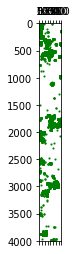

In [16]:
plt.spy(s, markersize=1, c='g')
plt.show()
#plt.savefig('gain.jpg', dpi=300, bbox_inches='tight')

In [1]:
from sklearn.cluster import KMeans

In [20]:
labeler = KMeans() 
# convert coo to csr format 
# note: Kmeans currently only works with CSR type sparse matrix 
labeler.fit(s)  

# print cluster assignments for each row 
for (row, label) in enumerate(labeler.labels_):   
  print("row %d has label %d"%(row, label))

row 0 has label 1
row 1 has label 1
row 2 has label 1
row 3 has label 1
row 4 has label 1
row 5 has label 1
row 6 has label 0
row 7 has label 1
row 8 has label 0
row 9 has label 0
row 10 has label 0
row 11 has label 1
row 12 has label 1
row 13 has label 1
row 14 has label 1
row 15 has label 1
row 16 has label 1
row 17 has label 1
row 18 has label 1
row 19 has label 1
row 20 has label 1
row 21 has label 1
row 22 has label 1
row 23 has label 1
row 24 has label 0
row 25 has label 1
row 26 has label 1
row 27 has label 1
row 28 has label 1
row 29 has label 1
row 30 has label 1
row 31 has label 1
row 32 has label 1
row 33 has label 6
row 34 has label 6
row 35 has label 6
row 36 has label 1
row 37 has label 1
row 38 has label 0
row 39 has label 4
row 40 has label 4
row 41 has label 4
row 42 has label 0
row 43 has label 0
row 44 has label 0
row 45 has label 0
row 46 has label 0
row 47 has label 0
row 48 has label 4
row 49 has label 4
row 50 has label 4
row 51 has label 4
row 52 has label 0
row

row 2394 has label 0
row 2395 has label 0
row 2396 has label 0
row 2397 has label 0
row 2398 has label 0
row 2399 has label 0
row 2400 has label 0
row 2401 has label 0
row 2402 has label 0
row 2403 has label 0
row 2404 has label 0
row 2405 has label 0
row 2406 has label 0
row 2407 has label 0
row 2408 has label 0
row 2409 has label 0
row 2410 has label 0
row 2411 has label 0
row 2412 has label 0
row 2413 has label 0
row 2414 has label 0
row 2415 has label 0
row 2416 has label 0
row 2417 has label 0
row 2418 has label 0
row 2419 has label 0
row 2420 has label 0
row 2421 has label 0
row 2422 has label 0
row 2423 has label 0
row 2424 has label 0
row 2425 has label 0
row 2426 has label 0
row 2427 has label 0
row 2428 has label 0
row 2429 has label 0
row 2430 has label 0
row 2431 has label 0
row 2432 has label 0
row 2433 has label 0
row 2434 has label 0
row 2435 has label 0
row 2436 has label 0
row 2437 has label 0
row 2438 has label 0
row 2439 has label 0
row 2440 has label 0
row 2441 has 

In [33]:
labeler.labels_.shape

(4000,)

In [30]:
plt.plot(labeler.transform(s)[:,0])
plt.show()

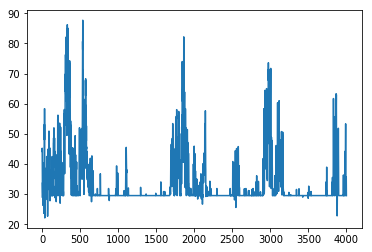

In [31]:
plt.plot(labeler.transform(s)[:,1])
plt.show()

In [32]:
plt.plot(labeler.transform(s)[:,2])
plt.show()

In [ ]:
y = labeler.transform(s)
plt.scatter(s.todense()[:,0], s.todense()[:,1], c=y, alpha=0.33333);

In [38]:
s.toarray()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
from scipy.cluster.vq import kmeans2, whiten

x, y = kmeans2(whiten(arr), 7, iter = 20)  #<--- I randomly picked 7 clusters
plt.scatter(arr[:,0], arr[:,1], c=y, alpha=0.33333);